In [1]:
%run library_discrete.py

Python version: 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
NumPy version: 1.23.5
pandas version: 1.5.3
matplotlib: 3.7.1
seaborn: 3.7.1
Sklearn version: 1.1.3
LightGBM: 2.2.3
XGBoost: 1.5.0


c:\Users\Windows\miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


TensorFlow: 2.12.0
SHAP: 0.41.0
missingno: 0.5.2
imblearn: 0.10.1


Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons


joblib: 1.1.1
tableone: 0.7.12


# DATA IMPORT AND CLEANING

In [2]:
# data import
dataset_path = "//wsl.localhost/Ubuntu/home/romain/GITHUB/Extub-IA/BDD/For_descriptif.xlsx" # Definition of the path containing the dataset

data = pd.read_excel(dataset_path) # Read it


In [3]:
#Definition of the useless column and save it in a list
list_useless = ['ID','Age > 65y', 'Male', 'Respiratory Admission','COVID19 Admission','Neurologic admission','Cardiac Arrest admission','Chirurgical admission',
                'Multivisceral Failure admission','Shock admission','Reintubation risk','Respiratory comorbidities','Cardiac comorbidities',
                'Total No. of comorbidities','Obesity','Respiratory Intubation','Neurologic Intubation','Chirurgical Intubation',
                'Cardiac arrest intubation','ZEEP','PEEP4','TT', 'Weaning success','Reason for extubation failure','Anterior auto extubation']

data_missing_stat = data.drop(list_useless,axis=1) # Drop useless colomuns with sensitive data, it's possible to add and encoding format with encoding="ISO-8859-1"

# MISSING VALUES STATISTICS

Text(0.5, -0.2, 'Dendrogram representation for missing value*')

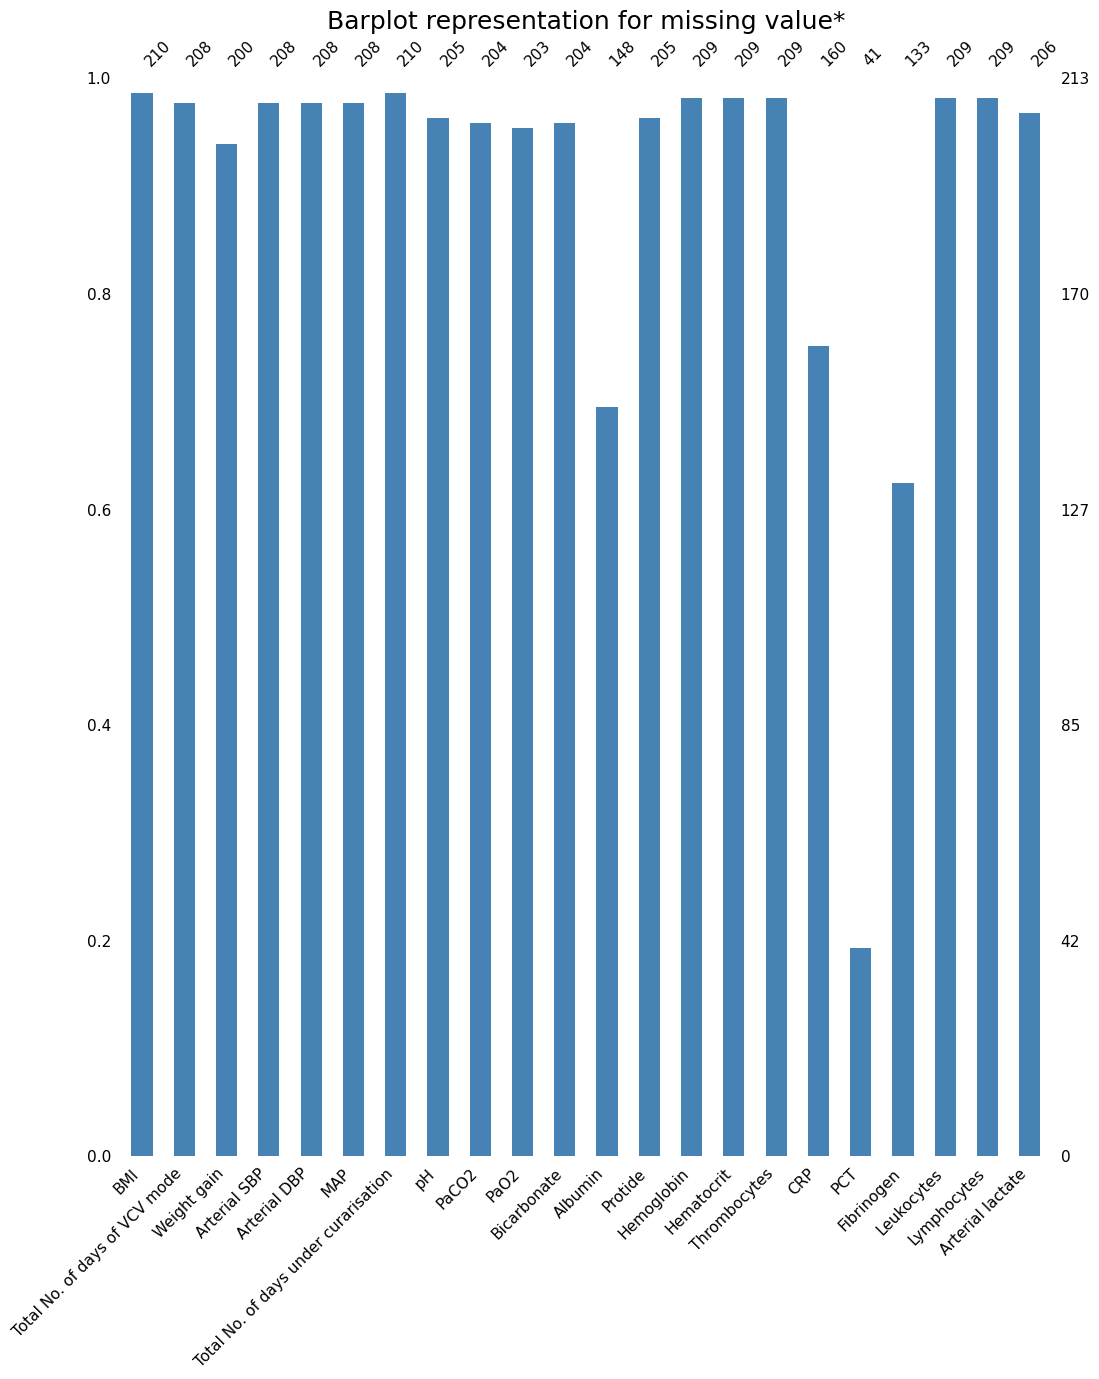

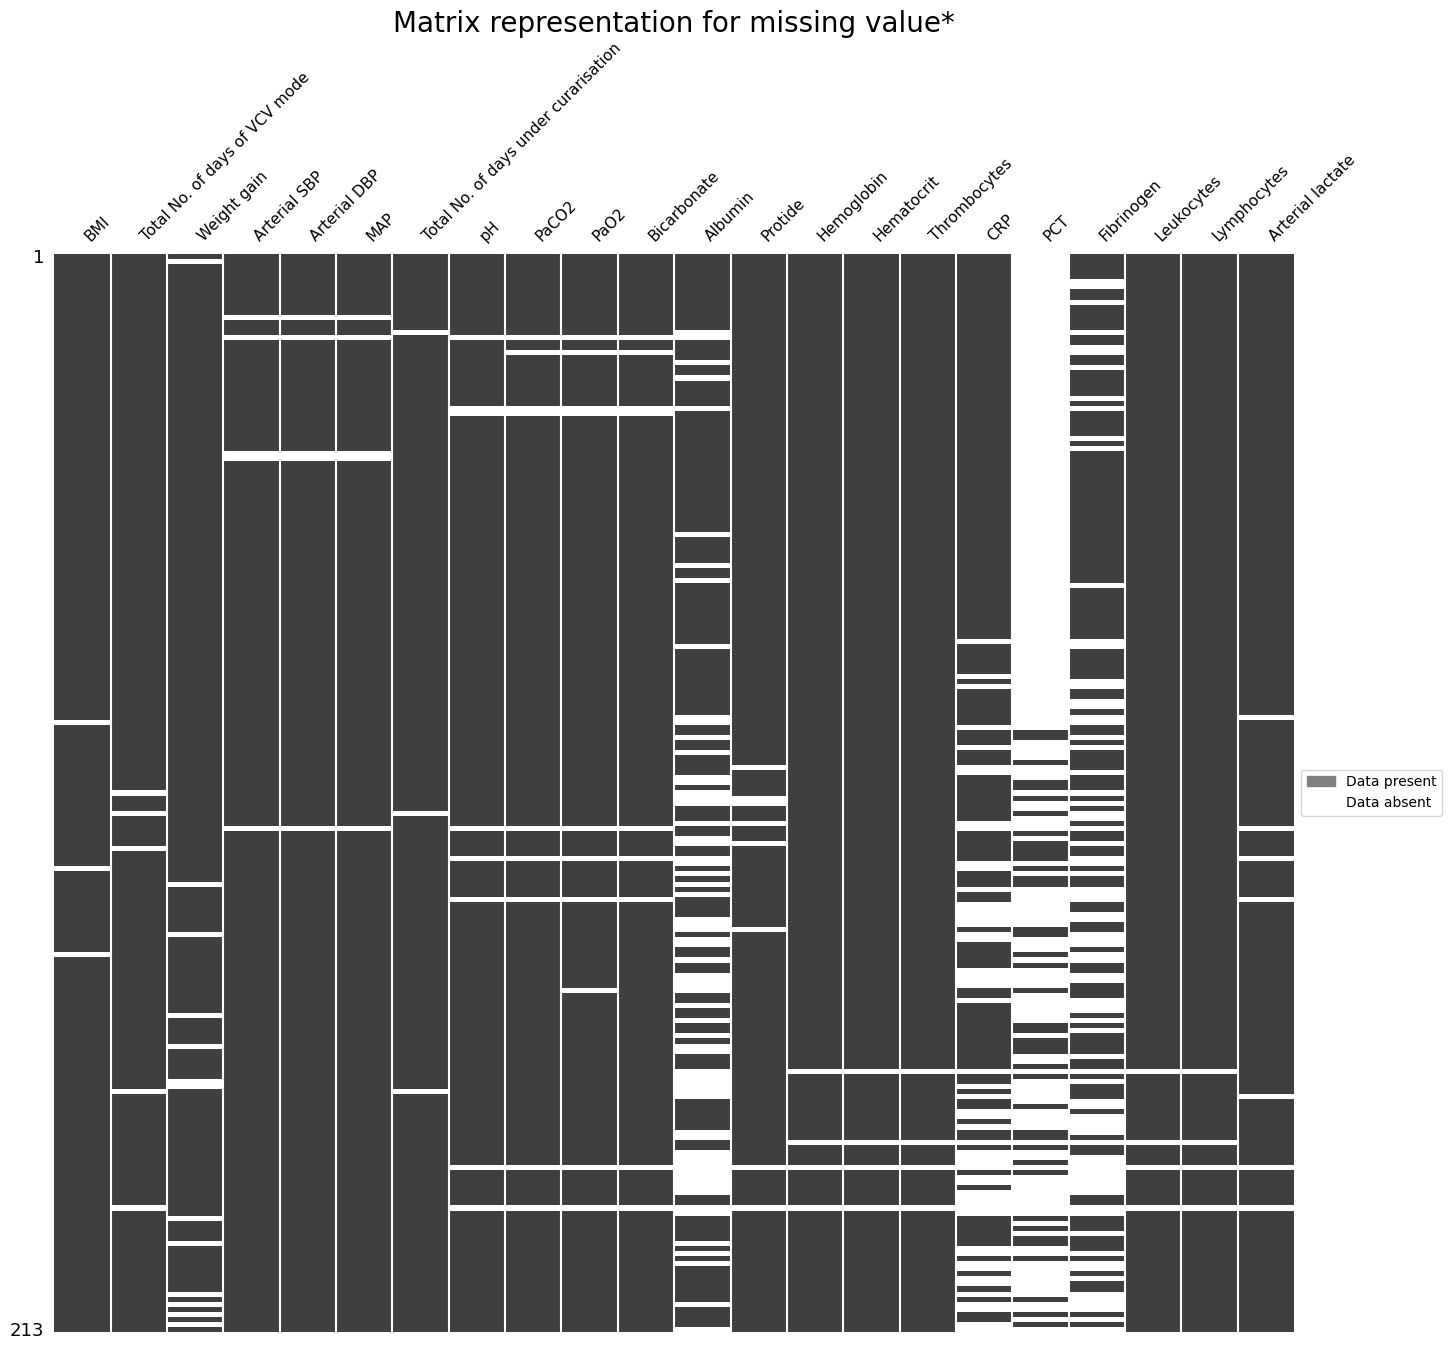

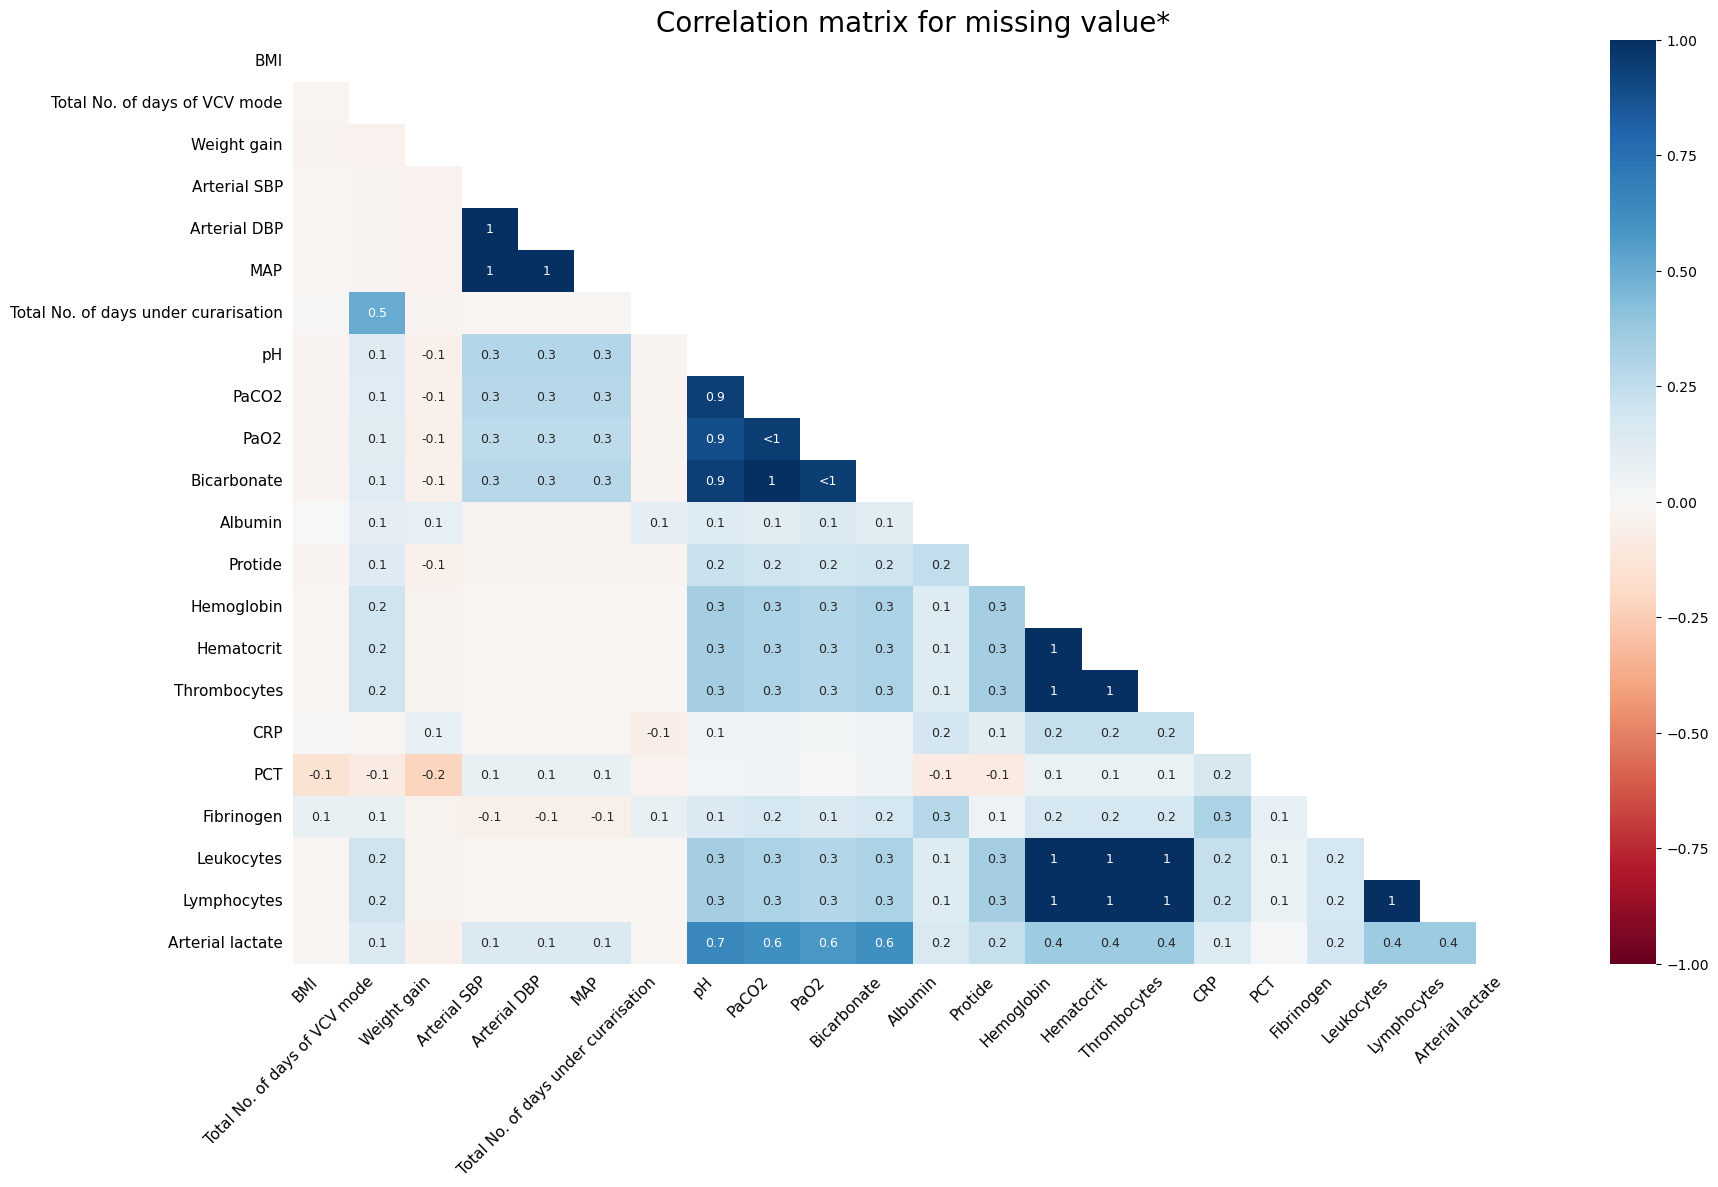

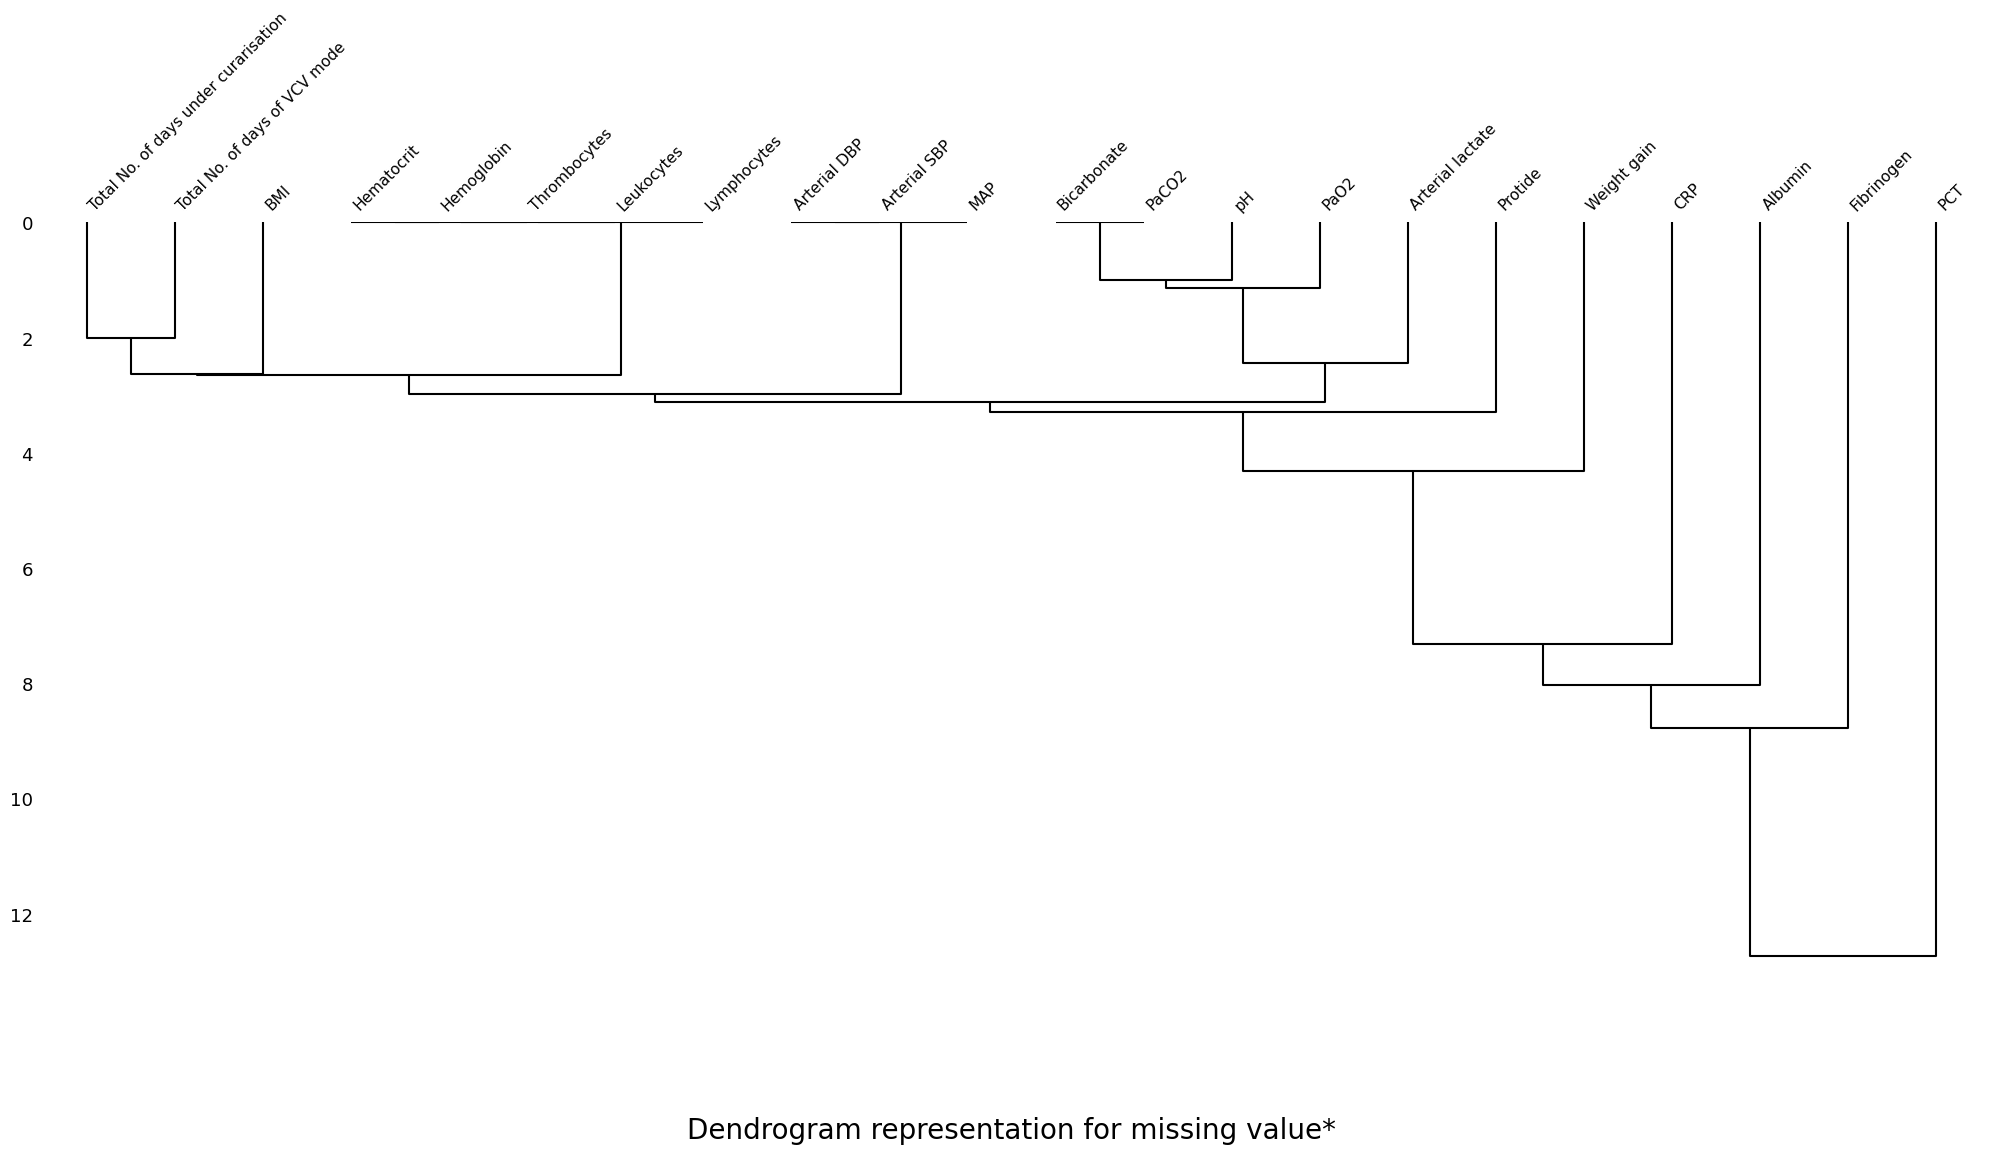

In [23]:
# Using the missingno library
filtered_data = msno.nullity_filter(data_missing_stat, filter='bottom', n=50, p=0.99) #take only the 50 columns with less than 0.95 of completion

# barplot
msno.bar(filtered_data, figsize=(12, 14), fontsize=11, color='steelblue')
plt.title("Barplot representation for missing value*", fontsize=18)
#plt.savefig('Missing_value_bar.png', dpi = 900)

# Matrix
msno.matrix(filtered_data, sparkline=False, figsize=(16, 14), width_ratios=(10, 1), fontsize=11) # Definition of the matrix
gray_patch = mpatches.Patch(color='gray', label='Data present') # plotting the legend
white_patch = mpatches.Patch(color='white', label='Data absent ') # Plotting the legend
plt.legend(handles=[gray_patch, white_patch], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Matrix representation for missing value*", fontsize=20)
plt.savefig('Missing_value_matrix.png', dpi = 900)

# Heatmap
msno.heatmap(filtered_data, fontsize=11)
plt.title("Correlation matrix for missing value*", fontsize=20)
plt.savefig('Missing_value_heat.png', dpi = 900)

#Dendogram
msno.dendrogram(filtered_data, fontsize=11)
plt.title("Dendrogram representation for missing value*", fontsize=20, y=-0.2)
#plt.savefig('Missing_value_dendro.png', dpi = 900)

## GLOBAL STATISTICS

We using PandasGUI, a practical overwiew for data analysis. Providing a graphical interface to pandas to making data manipulation and visualisation more accessible.

In [7]:
# Launch PandasGUI

pandasgui.show(data)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


# STATISTICS FOR THE TABLEONE

Tableone is a library permit to obtain easily the famous tableone 

In [4]:
# data import
dataset_path = "//wsl.localhost/Ubuntu/home/romain/GITHUB/Extub-IA/BDD/For_descriptif.xlsx" # Definition of the path containing the dataset

data = pd.read_excel(dataset_path) # Read it


#Definition of the useless column and save it in a list
list_useless = ['ID','Age > 65y', 'Sex', 'Admission type','Reintubation risk','Respiratory comorbidities','Cardiac comorbidities',
                'Total No. of comorbidities','Obesity','Reason for intubation','Weaning test type', 'Reason for extubation failure',
                'Anterior auto extubation', 'SpO2', 'FiO2', 'PEEP', 'RR', 'Minute Volume', 'Tidal Volume','Reason for weaning failure',
                'Arterial SBP','Arterial DBP','MAP','CR','Cumulative Urine output','Hourly Urine Output','Glycemia', 'Temperature','CPIS','RASS'
                ]

tableone_df = data.drop(list_useless,axis=1)

In [5]:
# Before realise the descriptive test we need to determine if the numerical variables have normal distribution.
# For that we made a Shapiro-wilk test
# If the P-value is <0.05 we can conclude the variable does not come from a normal distribution

df_shapiro = tableone_df.copy() # Save a copy for the shapiro wilk
df_shapiro.fillna(0,inplace=True) # fill Na with 0 for the shapiro wilk test

list_numeric = ['Age','LOS','SAPSII','Apache2','SOFA','BMI','Total No. of days of invasive MV','Delay from intubation to first SA','Total No. of days of VCV mode',
                'Prone position','Weight gain','total No. of Intermittent hemodialysis','Total No. of days of CVVH','Total No. of blood transfusion',
                'Total No. of days under curarisation', 'MIDAZOLAM (total dose 24H before test)', 'PROP (total dose 24H before test)', 
                'OPIOID (total dose 24H before test)', 'DEXMEDETOMIDINE (total dose 24H before test)',
                'pH','PaCO2','PaO2','Bicarbonate','Albumin','Protide','Creatinine','Urea','Kaliemia','Natremia',
                'Hemoglobin','Hematocrit','Thrombocytes','CRP','PCT','Fibrinogen','Leukocytes','Lymphocytes','Arterial lactate']

for i in list_numeric:
    print(f"For column {i} :", shapiro(df_shapiro[i]))
    print(f'----------------------------------------------------------------------------')

For column Age : ShapiroResult(statistic=0.9363201856613159, pvalue=5.100210742625677e-08)
----------------------------------------------------------------------------
For column LOS : ShapiroResult(statistic=0.6946998238563538, pvalue=1.9284053865630491e-19)
----------------------------------------------------------------------------
For column SAPSII : ShapiroResult(statistic=0.995214581489563, pvalue=0.7425016164779663)
----------------------------------------------------------------------------
For column Apache2 : ShapiroResult(statistic=0.9811731576919556, pvalue=0.006029217969626188)
----------------------------------------------------------------------------
For column SOFA : ShapiroResult(statistic=0.9256165027618408, pvalue=6.667034480045686e-09)
----------------------------------------------------------------------------
For column BMI : ShapiroResult(statistic=0.9400159120559692, pvalue=1.0794006044534399e-07)
----------------------------------------------------------------

In [6]:
# Definition of the categorical variable
categorical = ['Male','MIROG','Deceased status','Respiratory Admission','COVID19 Admission','Neurologic admission','Cardiac Arrest admission',
            'Chirurgical admission','Multivisceral Failure admission','Shock admission','Immunodepression','Neurodegenerative disease',
            'Chronic hepatic disease','Chronic kidney disease','COPD','Obstructive sleep apnea','Tobacco','Arterial Hypertension','Diabetes mellitus',
            'Ischemic cardiopathy','Dilated cardiomyopathy','Hypertrophic cardiomyopathy','Obstructive cardiomyopathy','Atrial fibrillation','Valvulopathy',
            'Respiratory Intubation','Neurologic Intubation','Chirurgical Intubation','Cardiac arrest intubation','ZEEP','PEEP4','TT', 'Extubation failure',
            'Pré-intubation NIV','Post-extubation NIV','NO', 'NOREPINEPHRINE (hospitalisation)','NOREPINEPHRINE (weaning test)','Other amine (weaning test)',
            'Antihypertensive (weaning test)','Extra-renal epuration','VAP', 'MIDAZOLAM (test)','Other BZD (test)','PROPOFOL (test)','OPIOID (test)',
            'NEUROLEPTIC (test)', 'Weaning success'
            ]

# Remove the normal variable find previously (Here only SAPSII)
list_numeric.remove('SAPSII')

# Definition of the non normal variables
nonnormal = list_numeric

# Selection of the only features of interest : 
columns = tableone_df.columns.values.tolist()

#Definition of the classifier
groupby = ['Weaning success'] 
labels={'Weaning success': 'Weaning success'} # Rename the label classification

# Make the statistics
mytable = TableOne(tableone_df, columns = columns, categorical = categorical, nonnormal=nonnormal, groupby=groupby, rename=labels, pval=True)

print(mytable.tabulate(tablefmt = "fancy_grid"))
# The tablefmt argument allows the table to be displayed in multiple formats, including "github", "grid", "fancy_grid", "rst", "html", and "late"

# Save the dataframe in excel format
mytable.to_excel('tableone.xlsx')

╒══════════════════════════════════════════════════════════════╤════════════════════╤═══════════╤═════════════════════╤═════════════════════╤═════════════════════╤═══════════╕
│                                                              │                    │ Missing   │ Overall             │ 0                   │ 1                   │ P-Value   │
╞══════════════════════════════════════════════════════════════╪════════════════════╪═══════════╪═════════════════════╪═════════════════════╪═════════════════════╪═══════════╡
│ n                                                            │                    │           │ 213                 │ 75                  │ 138                 │           │
├──────────────────────────────────────────────────────────────┼────────────────────┼───────────┼─────────────────────┼─────────────────────┼─────────────────────┼───────────┤
│ Age, median [Q1,Q3]                                          │                    │ 0         │ 65.0 [55.0,73.0]    │ 

# LABELS STATISTICS

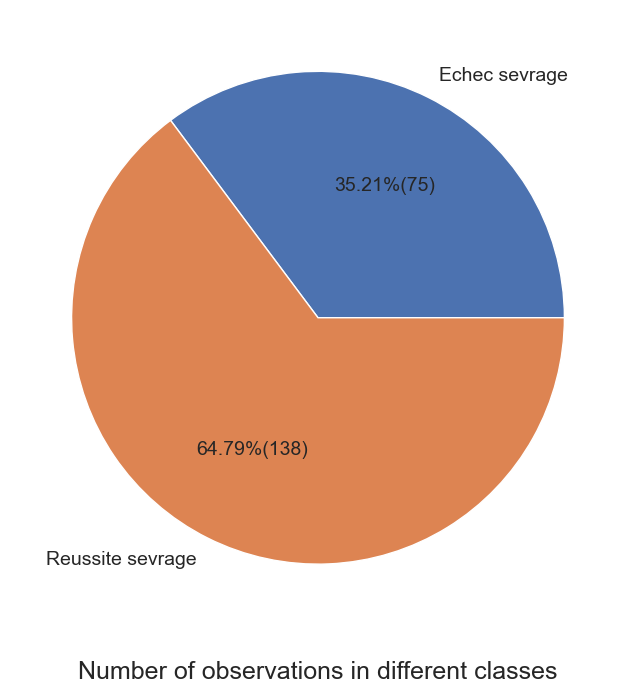

<Figure size 640x480 with 0 Axes>

In [19]:
path = "//wsl.localhost/Ubuntu/home/romain/GITHUB/Extub-IA/BDD/Labels.xls"

labels = pd.read_excel(path)

classe = labels.groupby('Reussite_sevrage').size()

name = 'Echec sevrage', 'Reussite sevrage'
sns.set()
classe.plot(kind='pie', labels=name, textprops={'fontsize': 14}, figsize=[8,8], autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*classe.sum()))
plt.title("Number of observations in different classes", fontsize=18, y=-0.1)
plt.show()

plt.savefig('No of observation in different classes.png', dpi = 900)
